# MODEL TEST ON g1.08e11

In [1]:
###############################################################################
#            TESTING THE MODEL FOR THE CUSP-CORE TRANSFORMATION               #
###############################################################################

import os
import sys
from numpy import *
from matplotlib.pylab import *
from decimal import Decimal
import pickle
import inspect
from scipy import stats

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/General')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Preparing')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Formatting')

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving

reload(treal_functions)
reload(general_functions)
reload(slopes_functions)
reload(prepare_functions)
reload(fit)
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# DEFAULT PARAMETERS

directory='/cs/sci/freundlich/CUSPCORE/NIHAO_data/'
xi=0.01
xi_merger=0.1
rmax_fit=1.
rmin_fit=0.01
rmax_evolve=1.
rmin_evolve=0.01
merger_thr=0.15
f_min=0.10
fmean_min=0.06
t_min=3.
Dsnapshot_threshold=0.07
Dfit_threshold=0.07
m_constraint=2.
component='d'
delta_xlim=[-2,-1.5]
delta_ymin=2.
# OPTIONS
plotting_option='tmin-crit-nomergers'
plot_criterion='f'
constrain_fit=False
constrain_evolution=False
Ttype='jeans'
# DISPLAY/PLOTTING OPTIONS
selection=[]
nrows=8
ncols=8
figsize=(20,20)
textfont=12
title=[]
plot_fprofile=True
plot_T=False
plot_alphabetagamma=False
test_best=False
print_summary=True
limits=[-2,-1,2,3]
limits_fprofile=[-2,0.,0,0.5]
limits_T=(-2,0,0,4)
limits_abg=(-2,0,-1,1)
xticks_val=(-2,-1.5,-1)
xticks_fprofile=(-2,-1.5,-1,-0.5,0)
savefigure=False
savedir='.'
do_color=True,
# SMOOTHING OPTIONS FOR ALPHABETAGAMMA
polyorder=3
sigma = 21
mode= 'interp'
double_smooth=False
linear_slopes=False
multi=False
use_RMvir=False
bgcolor_big_failure='moccasin'
bgcolor_big_success ='lightgreen'
bgcolor_small_failure='lightgoldenrodyellow'
bgcolor_small_success='white'


In [3]:
fontsize=12
fontsmall=fontsize
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsmall#fontsize-4

limits_fprofile=[-2.2, 0.2, -0.05, 0.55]

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 3
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 1
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 3
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsmall
rcParams['ytick.labelsize'] = fontsmall

rcParams['figure.subplot.left']=0.15/2.
rcParams['figure.subplot.right']=1-0.5/2.
rcParams['figure.subplot.bottom']=0.15/2.
rcParams['figure.subplot.top']=1-0.5/2.
rcParams['figure.subplot.wspace']=0.15
rcParams['figure.subplot.hspace']=0.15
rcParams['figure.subplot.wspace']=0
rcParams['figure.subplot.hspace']=0


In [4]:
# SPECIFIC PARAMETERS

sims = ['g1.08e11']
Ttype='Tmulti'
rmin_evolve=10**-1.75
rmax_evolve=1.
linear_slopes=True
savefigure=False
t_min=3.
xi_merger=0.15
merger_thr=0.1

delta_ymin=-1.
Dfit_threshold=0.1
fmean_min=0.06

nrows=10
ncols=5
figsize=(16,30)

selection=[]
#selection=array([14, 15, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 31, 32, 33, 35, 37, 38, 57])

limits=[-2.0, -1.0,-1.05, 0.1]
limits_fprofile=[-2.2, 0.2, -0.05, 0.55]


Simulation g1.08e11
Reducing the range of gl
Fitting done
Number of relevent snapshots:  50
Note: percents correspond to fmerger, frms, delta, Ds0, Dcmax


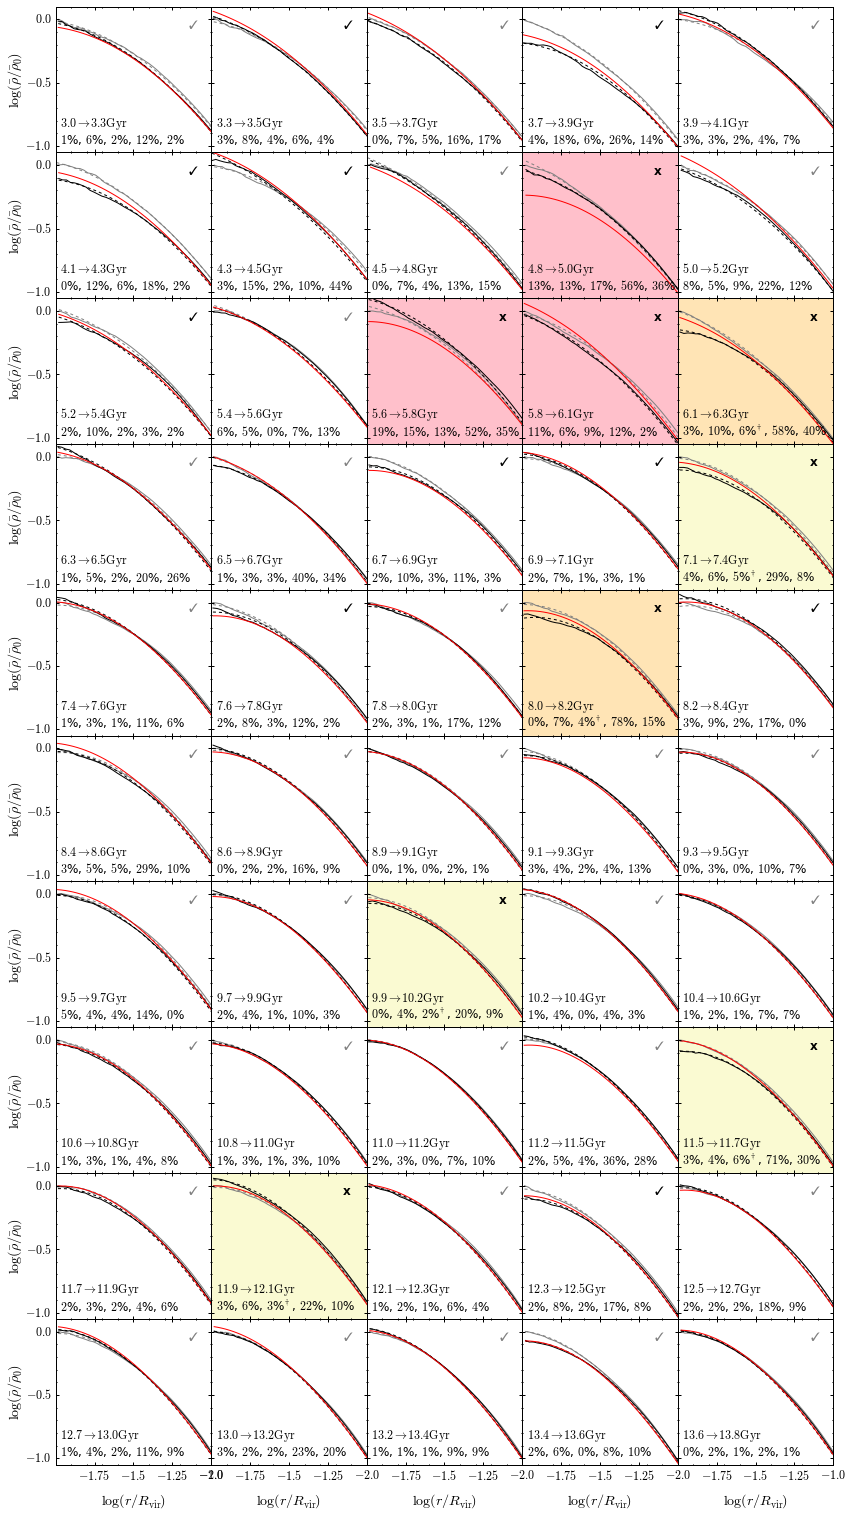

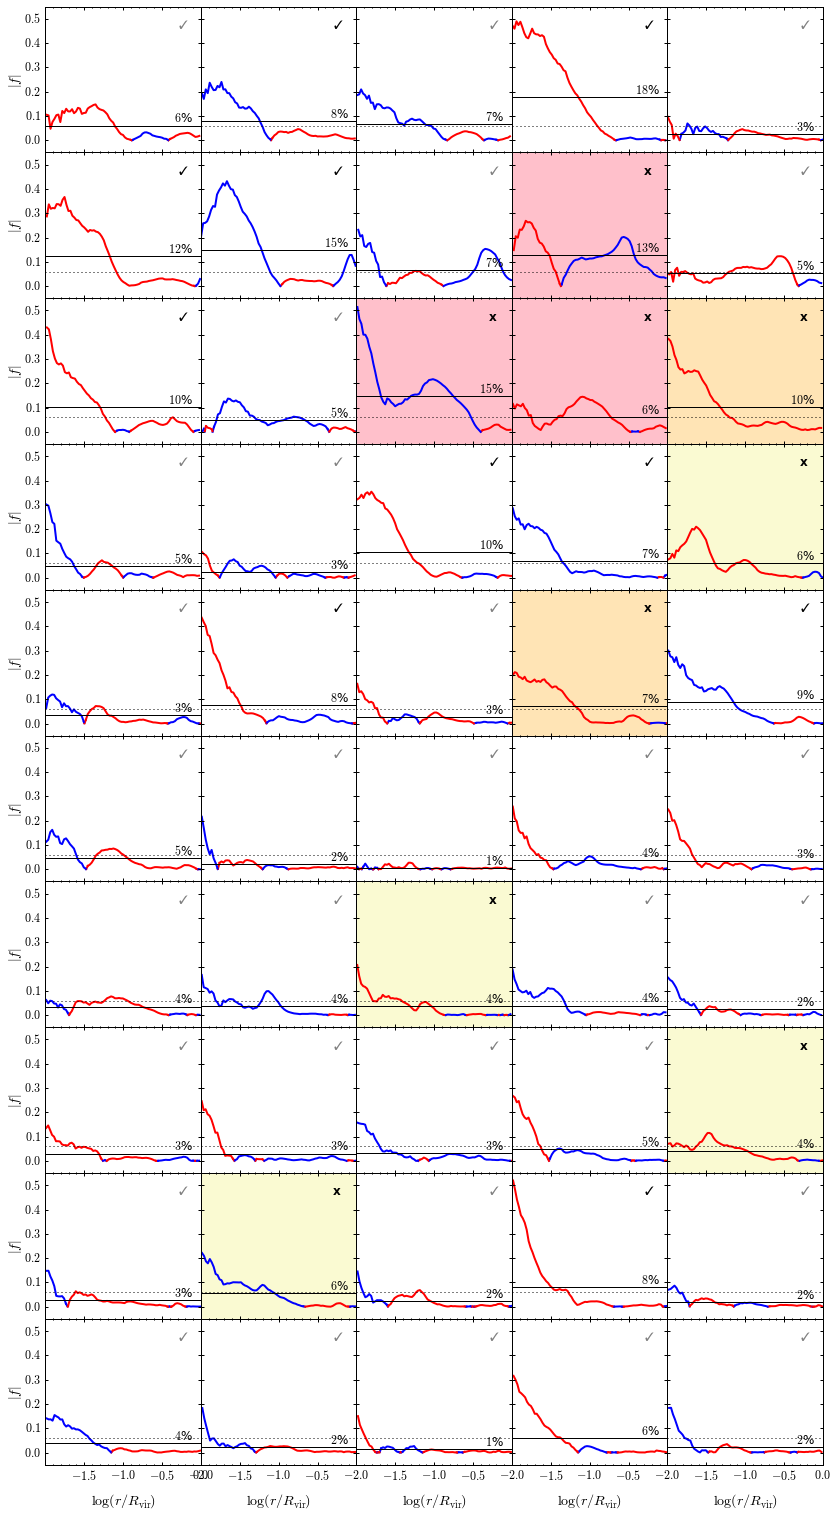

In [8]:
selection=[]

# CHECK FUNCTION PARAMETERS
if constrain_fit:
    fitname = 'lsfit_brho_b2_g3_constrained'
else: 
    fitname = 'lsfit_brho_b2_g3_unconstrained'

if constrain_fit and constrain_evolution:
    filestart='constrained'
elif not constrain_fit and not constrain_evolution:
    filestart='unconstrained'
else:
    filestart='mixed'

if test_best and not plot_fprofile:
    plot_fprofile = True
    print '    plot_fprofile was changed to True to allow test_best'
    print ' ' 
    
rlim=[log10(rmin_fit),log10(rmax_fit)]

# INITIALIZATION 
delta_all=[]
delta_i_all=[]
Dsnapshot_all=[]
fmean_all=[]
fstd_all=[]
fmerger_all=[]

#f_all=[]
f_tot=[]
delta_if_all=[]
delta_tot=[]
nsuccess_all=[]
nrelevent_all=[]
nmergers_all=[]
nochange_all=[]
nsample_all=[]
nearly_all=[]
fprofile_max=[]
#xi_all=[]

relevent_fangzhou_all=[]
relevent_all=[]
t1_array_all=[]
t2_array_all=[]
fmerger_all=[]

fbest_all=[]
Rbest_all=[]
xbest_all=[]
rprofile_all=[]
xprofile_all=[]

fprofile_all=[]
fprofile_simname=[]
mprofile_all=[]

R12_all=[]
Rvir_all=[]
Mvir_all=[]
xi_all=[]
ok_fangzhou_all=[]
Rvir_halo_all=[]
Mvir_halo_all=[]
Mstar_all=[]

R12_coldgas_all=[]
R12_coldbar_all=[]
R12_SFR_all=[]
Rs_NFW_all=[]
R2_Einasto_all=[]
Rc_Dekel_all=[]
Re_Sersic_star_all=[]

for sim in sims:   
        imin=0
        if sim=='g6.77e10': imin=1
        if sim=='g3.49e11': imin=6
        if sim=='g6.12e10': imin=27
        ############################################################
        # LOAD DATA 
        
        print 'Simulation %s'%sim
        with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
            gl = pickle.load(f)
            
        gl[imin:] = slopes_functions.derive_slopes(gl[imin:],polyorder=polyorder,sigma=sigma,mode=mode,double_smooth=double_smooth,rlim=rlim,use_fangzhou_Rvir=True,linearize=True,betanull=False)
        gl[imin:] = prepare_functions.define_brho( gl[imin:],polyorder=polyorder,sigma=sigma,mode=mode,double_smooth=double_smooth,rlim=rlim,use_fangzhou_Rvir=True)
        
        #treal=treal_functions.load_or_create_gl(sim,directory=directory,use_fangzhou_Rvir=True,c=component)
        
        fitrange=prepare_functions.get_fitrange(gl,use_fangzhou_Rvir=True,component=component)
        fitrange={'all':fitrange['all'][imin:],'d':fitrange['d'][imin:],'s':fitrange['s'][imin:],'g':fitrange['g'][imin:]}
        gl[imin:]=prepare_functions.reduce_range_gl(gl[imin:],fitrange)
        #treal[imin:]=prepare_functions.reduce_range_Treal(treal[imin:],fitrange)
        
        #components=['d']
        ############################################################

        r_all=[None] *size(gl)
        t_all=[None] *size(gl)
        brho_all=[None] *size(gl)
        brhov_all=[None] *size(gl)
        brhofit_all=[None] *size(gl)
        p_all=[None] *size(gl)
        brhofit_model_all=[None] *size(gl)
                           
        ############################################################
        # GET TIME, RVIR AND MVIR FOR EACH OUTPUT

        a_array=[]
        t1_array=[nan]
        t2_array=[nan]
        rvir_halo=[]
        mvir_halo=[]
        
        for (i,ss) in zip(range(size(gl)),gl):
            a_array.append(ss['a'])
            rvir_halo.append(ss['all']['Rvir'])
            mvir_halo.append(ss['all']['Mvir'])
            if i>0:  
                try:
                    t1_array.append(ss['flowdata']['t1'])
                    t2_array.append(ss['flowdata']['t2'])            
                except:
                    t1_array.append(nan)
                    t2_array.append(nan) 
                    
        a_array=array(a_array)
        t1_array=array(t1_array)
        t2_array=array(t2_array)
        rvir_halo=array(rvir_halo)
        mvir_halo=array(mvir_halo)
        
        ############################################################
        # GET RADII FROM FANGZHOU'S FILES
        
        ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou,mstar_fangzhou=get_fangzhou_radii(sim,a_array,get_stars=True)
        
        Mstar_all.append(mstar_fangzhou)
        ok_fangzhou_all.append(ok_fangzhou)
        R12_all.append(r12_fangzhou)
        Rvir_all.append(rvir_fangzhou)
        Mvir_all.append(mvir_fangzhou)
        Rvir_halo_all.append(rvir_halo)
        Mvir_halo_all.append(mvir_halo)
        xi_all.append(r12_fangzhou/rvir_fangzhou)
        
        ############################################################
        # CARRY OUT FITS FOR EACH SNAPSHOTS
        
        gl[imin:]=fit.do_fits(gl[imin:],rvir_fangzhou[imin:],mvir_fangzhou[imin:],rmax_fit,rmin_fit,m_constraint,components=[component])
        print 'Fitting done'
           
        ############################################################
        # DEFINE DIFFERENT QUANTITIES PER OUTPUT
        
        glsim = [ss for ss in gl[1:]]
        #times = [float(ss['t'].in_units('Gyr')) for ss in gl]
        fmerger = array([nan]+[get_f(gl,ss, xi_merger,Rtype='ratio',com='all') for ss in glsim])
        previous_fmerger=array([nan]+fmerger[:-1].tolist())
        
        #############
        fmean=[nan]
        for i in range(size(gl)-1):
            if i>imin:
                ssi=gl[i]
                ssf=gl[i+1]
                rf = ssf[component]['r']
                pi = ssi[component][fitname]['p']
                pf = ssf[component][fitname]['p']
                Rvirf=pf[4]
                m=[]
                for i in range(size(rf)):
                    mval=get_m(ssf,rf[i])
                    m.append(mval)
                m=array(m) 
                Mi_fit = prf.M(rf, pi)
                fprofile=m/Mi_fit
                maxr=rmax_fit*Rvirf
                fmean.append(mean(abs(array_nonan(fprofile[rf<=maxr]))))
            else:
                fmean.append(nan)

        fmean=array(fmean)
        
        #############
        
        rms = [nan]
        for ss in glsim:
            if 'rms' in ss['all'].keys(): rms.append(ss['all']['rms'])
            else: rms.append(nan)
        rms=array(rms)

        Dsnapshots=ones(size(gl))
        Dsnapshots[0]=nan
        for i in range(size(glsim)):
            try:
                rfit = gl[i+1][component]['r']
                Rvir = rvir_fangzhou[i+1]
                rr=rfit[(rfit>=rmin_fit*Rvir)&(rfit<=rmax_fit*Rvir)]
                if size(gl[i][component]['brho'])>0:
                    brhov = gl[i][component]['brho'][-1]
                else:
                    brhov = nan
                p1=gl[i][component][fitname]['p']
                p2=gl[i+1][component][fitname]['p']
                fit1=prf.brho(rr, p1, model='an')
                fit2=prf.brho(rr, p2, model='an')
                
                Dsnapshots[i+1]=fit.Delta_area(log10(rr/Rvir),log10(fit1/brhov),log10(fit2/brhov),xlimits=delta_xlim,ymin=delta_ymin)
            except:
                Dsnapshots[i+1]=nan

        relevent_fangzhou=ones(size(rvir_fangzhou),dtype=bool)
        for i in range(size(rvir_fangzhou)):
            if isnan(rvir_fangzhou[i]):
                relevent_fangzhou[i]=False
                if i<>size(rvir_fangzhou)-1:relevent_fangzhou[i+1]=False

        selection=where((t1_array>t_min)&(relevent_fangzhou)&(array(range(size(gl)))>imin))[0] 
        
        delta=nan*ones(size(gl))
        delta_i=nan*ones(size(gl))
        delta_if=nan*ones(size(gl))
        fmean=nan*ones(size(gl))
        fstd=nan*ones(size(gl))
        Dsin=nan*ones(size(gl))
        Dcmax=nan*ones(size(gl))
        
        ############################################################
        # CHOOSE PLOTTING OPTION
        
        relevent=where((relevent_fangzhou) & (t1_array>t_min))# & (abs(fmerger) < merger_thr)) # & (abs(previous_fmerger) < merger_thr))
        print 'Number of relevent snapshots: ',size(relevent)
        
        if size(selection)>0:
            relevent=(array(selection),)
            
        ############################################################
        # APPLY MODEL AND PLOT PROFILES
        
        rmss=[]
        fs=[]
        pmodel=[None] * size(gl)
        pmodel_T=[None] * size(gl)
        
        nsuccess=0
        nmergers=0
        nochange=0
        nearly=0
        
        fig = figure(figsize=figsize)
        
        fprofile_relevent=[]
        mprofile_relevent=[]
        Mi_relevent=[]
        rprofile_relevent=[]
        xprofile_relevent=[]
        #Treal_relevent=[]
        
        for index in range(size(relevent[0])):
                subplot(nrows,ncols,index+1)
                k=relevent[0][index]-1
                j=1 #1 for 'before', 2 for 'after'
                for (i,col,label) in zip((k,k+1),('gray','black'),('before','after')):

                    ############################################################
                    # RETRIEVE PROFILE FOR EACH OUTPUT
                    ss = gl[i]
                    a = array(ss['a'])
                    t = ss['t']
                    r = ss[component]['r']
    
                    brho = ss[component]['brho']
                    brhofit = ss[component][fitname]['brho']
                    rho = ss[component]['rho']
                    p = ss[component][fitname]['p']
                    
                    Rvir=rvir_fangzhou[i]
                    Mvir=mvir_fangzhou[i]
                    R12=r12_fangzhou[i]
                    Mstar=mstar_fangzhou[i]

                    r_all[i]=r
                    t_all[i]=t
                    brho_all[i]=brho
                    brhov_all[i]=brhov
                    brhofit_all[i]=brhofit
 
                    if j==1: 
                        brhov = brho[0]
                        Rviri = Rvir
                        Mviri = Mvir
                        Rstari= R12
                        Mstari= Mstar
                        ssi = ss
                    
                    if j==2:
                        Rvirf = Rvir
                        Mvirf = Mvir
                        Rstarf= R12
                        Mstarf= Mstar

                    ############################################################
                    # PLOT SIMULATED PROFILES
                    
                    plot(log10(r/Rvir),log10(brho/brhov),color=col,label=label)
                    plot(log10(r/Rvir),log10(brhofit/brhov),dashes=(3,3),color=col,lw=1)  

                    if j == 1:
                        ri = r
                        pi = p
                        brhofit_i = brhofit
                        gammai=ss[component]['gamma']
                        betai =ss[component]['beta_smooth']
                        alphai =ss[component]['alpha']
                        
                        
                    if j == 2:
                        rf = r
                        pf = p
                        brhofit_f = brhofit
                        gammaf=ss[component]['gamma']
                        betaf =ss[component]['beta_smooth'] 
                        alphaf =ss[component]['alpha']
                        t1 = ss['flowdata']['t1']
                        t2 = ss['flowdata']['t2']
                        
                        ############################################################
                        # DEFINE m and f
                        
                        m=[]
                        for i in range(size(rf)):
                            mval=get_m(ss,rf[i])
                            m.append(mval)
                        m=array(m)

                        Mi_fit = prf.M(rf, pi)
                        Mi_real=[]
                        for i in range(size(rf)):
                            R=rf[i]
                            Mi_real.append(ssi[component]['M'][abs(ssi[component]['r'] - R) == min(abs(ssi[component]['r'] - R))][0])
                        Mi_real=array(Mi_real)
                        
                        add_params=[]
                        Mi=Mi_fit
                        fprofile=m/Mi 
                        
                        ############################################################

                        mprofile_relevent.append(m)
                        rprofile_relevent.append(rf)
                        xprofile_relevent.append(rf/Rvir)
                        fprofile_relevent.append(fprofile)
                        Mi_relevent.append(Mi)
                        
                        #Treal_relevent.append(treal[k][:3])
                        
                        #####################################################
                        # EVOLVE PROFILE
                        
                        wcore = 0*(r<=rmin_evolve*Rvirf)+1*((r>rmin_evolve*Rvirf)&(r<=rmax_evolve*Rvirf))+0*(r>rmax_evolve*Rvirf)
                        nancore=nan*ones_like(wcore)
                        nancore[where(wcore==1)]=1
                           
                        if Ttype=='Tmulti':
                            M_rmin=max(ssi[component]['r'][0],ssi['all']['r'][0])
                            M_d = ssi[component]['M'][where(ssi[component]['r']>M_rmin)]
                            M_a = ssi['all']['M'][where(ssi[component]['r']>M_rmin)]
                            M_rr=ri[where(ssi[component]['r']>M_rmin)]
                            M_ratio=M_a/M_d

                            slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rviri),log10(M_ratio))
                            Mratio=10**intercept
                            Mn=-slope
                            add_params=[Mratio,Mn]
                           
                        alphai_evol=alphaf
                        betai_evol=betaf
                        gammai_evol=gammaf

                        alphaf_evol=alphaf
                        betaf_evol=betaf
                        gammaf_evol=gammaf
            
                        if constrain_evolution:
                            exec("constraint=({'type': 'ineq', 'fun': lambda x:  x[1]+3*sqrt(x[0]*%.12f/%.12f)})"%(rmin,float(Rvir)))
                            res = evolve_constrained(rf, rf, Mi, pi, m, constraint,alphai_evol,alphaf_evol,gammai_evol, gammaf_evol,betai_evol,betaf_evol, Ttype=Ttype,w=wcore, method='halo',add_params=add_params)

                        else:
                            if use_RMvir:
                                res = evolve(rf, rf, Mi, pi, m, alphai_evol,alphaf_evol,gammai_evol, gammaf_evol,betai_evol,betaf_evol, Ttype=Ttype, w=wcore, method='halo',add_params=add_params,Rvirf=Rvirf,Mvirf=Mvirf)
                            else:
                                res = evolve(rf, rf, Mi, pi, m, alphai_evol,alphaf_evol,gammai_evol, gammaf_evol,betai_evol,betaf_evol, Ttype=Ttype, w=wcore, method='halo',add_params=add_params)#,Rvirf=Rvirf,Mvirf=Mvirf)

                        if Ttype=='jeans-gamma':
                            print 'gamma = ', res['gammaf']
                        
                        p_model = res['pf']
                        brhofit_model = prf.brho(rf,res['pf'])
                        rhofit_model = prf.rho(rf,res['pf'])
                        ss.update({'evolution_rms':fit.rmslog(brhofit_f,brhofit_model)})
                        rmss.append(fit.rmslog(brhofit_f,brhofit_model))
                        

                        ############################################################
                        # QUANTITIES USED IN THE EVOLUTION

                        Mi_evol = prf.M(rf, pi, "an")
                        rf_evol = prf.inv_M(Mi_evol, p_model, "an") #the new radii that enclose the same masses
                        Ui_evol = prf.U(rf, pi, "an")
                        Uf_evol = prf.U(rf, p_model, "an")
                        Ti_evol=get_T(rf,[alphai_evol,betai_evol,gammai_evol,pi],m=0.,Ttype=Ttype,do_smooth=False,add_params=add_params)
                        Tf_evol=get_T(rf,[alphaf_evol,betaf_evol,gammaf_evol,pf],m=m ,Ttype=Ttype,do_smooth=False,add_params=add_params)
                        Ei_evol = Ui_evol - G*m/rf + Ti_evol #0.5*G*Mi/ri
                        Ef_evol = Uf_evol - G*m/rf_evol + Tf_evol #0.5*G*Mi/rf 

                        ############################################################
                        # PLOT PREDICTED PROFILE
                        
                        plot(log10(rf/Rvir),log10(brhofit_model/brhov),'-',color='red',label='toy model',lw=1)

                    j+=1
                
                p_all[k+1]=p
                brhofit_model_all[k+1]=brhofit_model
                
                ############################################################
                # ASSESS THE PREDICTION SUCCESS
                
                maxr = rmax_fit*Rvirf
                rr=rf[rf<=maxr]
                Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, pf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
                delta[k+1]=Darea
                
                Darea_i=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
                delta_i[k+1]=Darea_i
                
                Darea_if=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, pf)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
                delta_if[k+1]=Darea_if     
                
                maxr = rmax_evolve*Rvirf
                fmean[k+1] = mean(abs(array_nonan(fprofile[rf<=maxr])))
                fstd[k+1] = std(abs(array_nonan(fprofile[rf<=maxr])))

                Dsin[k+1]=abs((prf.s(0.01*Rvir,p_model)-prf.s(0.01*Rvir,pf))/prf.s(0.01*Rvir,pf))
                Dcmax[k+1]=abs((prf.cmax(p_model)-prf.cmax(pf))/prf.cmax(pf))
                ############################################################
                # COLOR THE PLOTS AND COUNT THE NUMBER OF SUCCESSES

                ax = gca()
                criteria           = t1,    Dsnapshots[k+1],     fmerger[k+1], Darea,Darea_i,Darea_if, fmean[k+1]
                criteria_threshold = t_min, Dsnapshot_threshold, merger_thr,   Dfit_threshold,fmean_min
                counts             = [nearly,nochange,nmergers,nsuccess]
                
                if (abs(fmerger[k+1]) > merger_thr):
                    col = 'black'
                    bgcolor='pink'
                    ax.set_axis_bgcolor('pink')  
                    #info=r' $\rm (merger)$'
                    info=''
                ######### fmean > fmean_min
                elif (fmean[k+1]>fmean_min) and (delta[k+1]>Dfit_threshold):
                    col = 'black'
                    bgcolor=bgcolor_big_failure #'moccasin'
                    ax.set_axis_bgcolor(bgcolor)  
                    #info=r' $(>f_{\rm min})$'
                    info=''
                elif (fmean[k+1]>fmean_min) and (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                    col = 'black'
                    bgcolor=bgcolor_big_failure #'moccasin'
                    ax.set_axis_bgcolor(bgcolor) 
                    #info=r' $(>f_{\rm min})^\dagger$'
                    info=r'$^\dagger$'
                ######### fmean < fmean_min
                elif (fmean[k+1]<fmean_min) and (delta[k+1]>Dfit_threshold):
                    col = 'black'
                    bgcolor=bgcolor_small_failure #'lightgoldenrodyellow'
                    ax.set_axis_bgcolor(bgcolor) 
                    info=''
                elif (fmean[k+1]<fmean_min) and (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                    col = 'black'
                    bgcolor=bgcolor_small_failure #'lightgoldenrodyellow'
                    ax.set_axis_bgcolor(bgcolor) 
                    info='$^\dagger$'
                ######### REMAINING SUCCESSES
                else: 
                    col = 'black' 
                    bgcolor=bgcolor_small_success #'white'
                    info=''
                    if (fmean[k+1]>fmean_min):
                        bgcolor='white' #bgcolor_big_success #'lightgreen'
                        ax.set_axis_bgcolor(bgcolor) 

                ############################################################
                # INDICATE SOME INFORMATION ON THE PLOTS
                
                ax.text(0.03,0.18, r'${:.01f}$'.format(t1) + r'$\rm \rightarrow$' + r'${:.01f}$'.format(t2) + r'$\rmGyr$', transform=ax.transAxes, color=col,fontsize=fontsmall)
                ax.text(0.03,0.06, r'$%.0f$'%abs(fmerger[k+1]*100.)+'%'+r', $%.0f$'%(fmean[k+1]*100.)+'%'+', $%.0f$'%(abs(delta[k+1]*100.))+'%'+info+', $%.0f$'%(abs(Dsin[k+1]*100.))+'%'+', $%.0f$'%(abs(Dcmax[k+1]*100.))+'%', transform=ax.transAxes,color=col,fontsize=fontsmall)

                if (delta[k+1]>Dfit_threshold) or (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                    text(0.85,0.85, r'x', weight='bold',transform=ax.transAxes,fontsize=fontsmall)
                elif fmean[k+1]>fmean_min:
                    text(0.85,0.85, r'$\checkmark$', transform=ax.transAxes,fontsize=fontsmall)
                else:
                    text(0.85,0.85, r'$\checkmark$', color='gray', transform=ax.transAxes,fontsize=fontsmall)
                
                ax.set_xticks([-2,-1.5,-1])
                ax.set_xticklabels([r'',r'',r''], fontdict={'fontsize':fontsmall})
                
                ax.set_yticks([-1.,-0.5,0])
                ax.set_yticklabels([r'',r'',r''], fontdict={'fontsize':fontsmall})
               
                lastrow = size(relevent[0])-ncols
                ax.set_xticks([-2,-1.75,-1.5,-1.25,-1])
                if index == lastrow: 
                    ax.set_xticklabels([r'',r'$-1.75$',r'$-1.5$',r'$-1.25$',r'$-1.0$'], fontdict={'fontsize':fontsmall})
                elif (index > lastrow) and (index<size(relevent[0])-1):
                    ax.set_xticklabels([r'$-2.0$',r'$-1.75$',r'$-1.5$',r'$-1.25$',r''], fontdict={'fontsize':fontsmall})
                elif index==size(relevent[0])-1:
                    ax.set_xticklabels([r'$-2.0$',r'$-1.75$',r'$-1.5$',r'$-1.25$',r'$-1.0$'], fontdict={'fontsize':fontsmall})

                ax.set_xticks([-1.9,-1.8,-1.7,-1.6,-1.4,-1.3,-1.2,-1.1], minor=True)
                ax.set_yticks([-1,-0.5,0.0])
                ax.set_yticklabels([r'$-1.0$',r'$-0.5$',r'$0.0$'], fontdict={'fontsize':fontsmall})
                ax.set_yticks([-0.9,-0.8,-0.7,-0.6,-0.4,-0.3,-0.2,-0.1], minor=True)

                
                ax.axis(limits)
                
                lastrow = size(relevent[0])-ncols 
                if not(index >= lastrow): ax.set_xticklabels([])
                if index >= lastrow: xlabel(r'$\log(r/R_{\rmvir})$',labelpad=10, fontsize=fontsmall+2)#,fontsize=textfont+2)
                if not(Decimal(str(index)) % Decimal(str(ncols)) == 0): ax.set_yticklabels([])
                if Decimal(str(index)) % Decimal(str(ncols)) == 0: ylabel(r'$\log(\bar{\rho}/\bar{\rho}_{0})$',labelpad=0,fontsize=fontsmall+2)

        ############################################################
        # DEFINE SOME QUANTITIES FOR ALL SIMULATIONS
        
        relevent_fangzhou_all.append(relevent_fangzhou)
        relevent_all.append(relevent)
        t1_array_all.append(t1_array)
        t2_array_all.append(t2_array)
        fmerger_all.append(fmerger)
        Dsnapshot_all.append(Dsnapshots)
        delta_all.append(array(delta))
        delta_i_all.append(array(delta_i))
        delta_if_all.append(array(delta_if))
        nearly_all.append(nearly)
        nsuccess_all.append(nsuccess)
        nrelevent_all.append(size(relevent[0]))
        nmergers_all.append(nmergers)
        nochange_all.append(nochange)
        nsample_all.append(size(relevent[0])-nearly-nmergers-nochange)
        fmean_all.append(array(fmean))
        fstd_all.append(array(fstd))
    
        print 'Note: percents correspond to fmerger, frms, delta, Ds0, Dcmax'
        #savefig('/cs/sci/freundlich/CUSPCORE/ARTICLE/figures3/%s_density.pdf'%sim.replace('.',''))
        
        ############################################################
        limits_fprofile=[-2., 0., -0.05, 0.55]

        fig = figure(figsize=figsize)
        for index in range(size(relevent[0])):

            subplot(nrows,ncols,index+1)
            k=relevent[0][index]-1
            t1=t1_array[k+1]
            t2=t2_array[k+1]

            for i in range(size(xprofile_relevent[index])-1):
                if sign(fprofile_relevent[index][i])<>sign(fprofile_relevent[index][i+1]):
                    x=linspace(log10(xprofile_relevent[index])[i],log10(xprofile_relevent[index])[i+1],10)
                    y=linspace(fprofile_relevent[index][i],fprofile_relevent[index][i+1],10)
                    yupper=np.ma.masked_where(y < 0., y)
                    ylower=np.ma.masked_where(y >= 0., y)
                    plot(x,yupper,'b',x,-ylower,'r',lw=2)

            supper=np.ma.masked_where(fprofile_relevent[index] < 0., fprofile_relevent[index])
            slower=np.ma.masked_where(fprofile_relevent[index] >= 0., fprofile_relevent[index])
            plot(log10(xprofile_relevent[index]),supper,'b',log10(xprofile_relevent[index]),-slower,'r',lw=2)

            axhline(y=fmean[k+1],color='k',linestyle='-')
            axhline(y=0.06,color='k',linestyle=':')

            ax = gca()
            if (abs(fmerger[k+1]) > merger_thr):
                col = 'black'
                bgcolor='pink'
                ax.set_axis_bgcolor('pink')  
                info=r' $\rm (merger)$'
            ######### fmean > fmean_min
            elif (fmean[k+1]>fmean_min) and (delta[k+1]>Dfit_threshold):
                col = 'black'
                bgcolor=bgcolor_big_failure #'moccasin'
                ax.set_axis_bgcolor(bgcolor)  
                #info=r' $(>f_{\rm min})$'
                info=''
            elif (fmean[k+1]>fmean_min) and (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                col = 'black'
                bgcolor=bgcolor_big_failure #'moccasin'
                ax.set_axis_bgcolor(bgcolor) 
                #info=r' $(>f_{\rm min})^\dagger$'
                info=r'$^\dagger$'
            ######### fmean < fmean_min
            elif (fmean[k+1]<fmean_min) and (delta[k+1]>Dfit_threshold):
                col = 'black'
                bgcolor=bgcolor_small_failure #'lightgoldenrodyellow'
                ax.set_axis_bgcolor(bgcolor) 
                info=''
            elif (fmean[k+1]<fmean_min) and (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                col = 'black'
                bgcolor=bgcolor_small_failure #'lightgoldenrodyellow'
                ax.set_axis_bgcolor(bgcolor) 
                info='$^\dagger$'
            ######### REMAINING SUCCESSES
            else: 
                col = 'black' 
                bgcolor=bgcolor_small_success #'white'
                info=''
                if (fmean[k+1]>fmean_min):
                    bgcolor='white' #bgcolor_big_success #'lightgreen'
                    ax.set_axis_bgcolor(bgcolor) 

            ############################################################
            # INDICATE SOME INFORMATION ON THE PLOTS

            ax.text(-0.1,fmean[k+1]+0.015, r'$%.0f$'%(fmean[k+1]*100)+'%', fontsize = fontsmall,color='k',horizontalalignment='right')

            if (delta[k+1]>Dfit_threshold) or (delta[k+1]>delta_i[k+1]) and (delta_if[k+1]>0.03):
                text(0.85,0.85, r'x', weight='bold',transform=ax.transAxes,fontsize=fontsmall)
            elif fmean[k+1]>fmean_min:
                text(0.85,0.85, r'$\checkmark$', transform=ax.transAxes,fontsize=fontsmall)
            else:
                text(0.85,0.85, r'$\checkmark$', color='gray', transform=ax.transAxes,fontsize=fontsmall)

            lastrow = size(relevent[0])-ncols
            ax.set_xticks([-2,-1.5,-1,-0.5,0.])
            if index == lastrow: 
                ax.set_xticklabels([r'',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$'], fontdict={'fontsize':fontsmall})
            elif (index > lastrow) and (index<size(relevent[0])-1):
                ax.set_xticklabels([r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r''], fontdict={'fontsize':fontsmall})
            elif index==size(relevent[0])-1:
                ax.set_xticklabels([r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$'], fontdict={'fontsize':fontsmall})

            ax.set_xticks([-1.9,-1.8,-1.7,-1.6,-1.4,-1.3,-1.2,-1.1,-.9,-.8,-.7,-.6,-.4,-.3,-.2,-.1], minor=True)
                                
            ax.set_yticks([0.,0.1,0.2,0.3,0.4,0.5])
            ax.set_yticklabels([r'$0.0$',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$',r'$0.5$'], fontdict={'fontsize':fontsmall})

            ax.axis(limits_fprofile)

            lastrow = size(relevent[0])-ncols #round(size(relevent[0])/ncols-1)*nrows
            if not(index >= lastrow): ax.set_xticklabels([])
            if index >= lastrow: xlabel(r'$\log(r/R_{\rmvir})$',labelpad=10, fontsize=fontsmall+2)#,fontsize=textfont+2)
            if not(Decimal(str(index)) % Decimal(str(ncols)) == 0): ax.set_yticklabels([])
            if Decimal(str(index)) % Decimal(str(ncols)) == 0: ylabel(r'$|f|$',labelpad=0, fontsize=fontsmall+2)
                
        #savefig('/cs/sci/freundlich/CUSPCORE/ARTICLE/figures3/%s_fprofile.pdf'%sim.replace('.',''))


# SUCCESSIVE EVOLUTION

In [13]:
# TEST MODEL OVER SUCCESSIONS OF SNAPSHOTS // SUCCESSIVE MASS CHANGES

succession_start_Gyr=6

n_outputs=size(gl)
succession_start=int(floor(succession_start_Gyr/0.21576941)+1)
succession=linspace(succession_start,n_outputs-1,n_outputs-succession_start)
Ns=size(succession)
print succession

pmodel_successive=[(nan,nan,nan,nan,nan,nan)]*n_outputs
s0_successive=nan*ones(n_outputs)

ki=int(succession[0]-1)
kf=int(succession[-1])

ssi=gl[ki]
ssf=gl[kf]
ti= ssi['t']
tf= ssf['t']
ri=ssi['d']['r']
rf=ssf['d']['r']
paramsi=ssi['d']['lsfit_brho_b2_g3_unconstrained']['p']
paramsf=ssf['d']['lsfit_brho_b2_g3_unconstrained']['p']
Rviri=paramsi[4]
Rvirf=paramsf[4]

rhoi = ssi['d']['rho']
brhoi = ssi['d']['brho']
brhofiti = prf.brho(ri,paramsi)
brhov = brhoi[0]

rhof = ssf['d']['rho']
brhof = ssf['d']['brho']
brhofitf = prf.brho(rf,paramsf)

wcore = 0*(rf<=rmin_evolve*Rvirf)+1*((rf>rmin_evolve*Rvirf)&(rf<=rmax_evolve*Rvirf))+0*(rf>rmax_evolve*Rvirf)

paramsk=paramsi
pmodel_successive[ki]=paramsk
s0_successive[ki]=prf.s(rmin_fit*paramsk[4],paramsk)
count_mergers=0
for i in range(Ns):
    k=ki+i

    mk=[]
    for rf_i in rf:
        mk.append(get_m(gl[k+1],rf_i))
    mk=array(mk)    

    Mk=prf.M(rf, paramsk)
    
    try:
        ssk=gl[k]
        Rvir=paramsk[4]
        M_rmin=max(ssk['d']['r'][0],ssk['all']['r'][0])
        M_d = ssk['d']['M'][where(ssk['d']['r']>M_rmin)]
        M_a = ssk['all']['M'][where(ssk['d']['r']>M_rmin)]
        M_rr=ssk['d']['r'][where(ssk['d']['r']>M_rmin)]
        M_ratio=M_a/M_d
        slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rvir),log10(M_ratio))
        Mratio=10**intercept
        Mn=-slope
    except:
        Mratio=nan
        Mn=nan

    #res = evolve(rf, rf, Mk, paramsk, mk,Ttype='Tmulti', w=wcore,add_params=[Mratio,Mn])
    res = evolve(rf, rf, Mk, paramsk, mk,Ttype='Tmulti', w=wcore,add_params=[Mratio,Mn])#,Rvirf=rvir_fangzhou[k+1],Mvirf=mvir_fangzhou[k+1])
    paramsk = res['pf']
    brhofit_model_k = prf.brho(rf,res['pf'])

    pmodel_successive[k+1]=paramsk
    s0_successive[k+1]=prf.s(rmin_fit*paramsk[4],paramsk)
    if fmerger[k+1]>merger_thr: count_mergers+=1

p_model=paramsk
brhofit_model= prf.brho(rf,p_model)

maxr = rmax_fit*Rvirf
rr=rf[rf<=maxr]
Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, paramsf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)

#print '%i/%i:'%(isuccession,nsuccessions_3Gyr),'ki=', ki, 'kf=',kf, 'ti=%.2f Gyr'%ti, 'tf=%.2f Gyr'%tf, 'delta=%.2f'%Darea, merger_info

#output_file_delta='/cs/sci/freundlich/CUSPCORE/ARTICLE/output_%s_delta_successive_all_unconstrained.pickle'%sim
#with open(output_file_delta, 'w') as f:
#    pickle.dump([successions_3Gyr,N_successions_3Gyr,delta_successive,pi_successive,pf_successive,pmodel_successive,ismerger_successive], f)

print 'Done!'


[ 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.]
Done!


6.05878373526 13.8264825565 0.261243025256


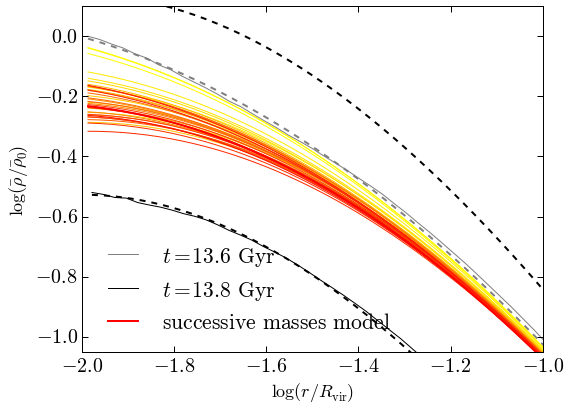

In [16]:
# TEST MODEL OVER ONE SUCCESSION OF SNAPSHOTS // SUCCESSIVE MASS CHANGES

import matplotlib.colors as colors
import matplotlib.cm as cmx

jet = plt.get_cmap('autumn') 
cNorm  = colors.Normalize(vmin=0, vmax=Ns-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

figure(figsize=figsize)
plot(log10(ri/Rviri),log10(brhoi/brhov),color='gray',label=r'$t=%.1f$ $\rm Gyr$'%t1)
plot(log10(ri/Rviri),log10(brhofiti/brhov),'--',color='gray',lw=2)  
    
plot(log10(rf/Rvirf),log10(brhof/brhov),color='k',label=r'$t=%.1f$ $\rm Gyr$'%t2)
plot(log10(rf/Rvirf),log10(brhofitf/brhov),'--',color='k',lw=2)  

for i in range(Ns):
    k=ki+i

    brhofit_model_k = prf.brho(ri,pmodel_successive[k+1])
    colorVal = scalarMap.to_rgba(Ns-i)
    plot(log10(ri/pmodel_successive[k+1][4]),log10(brhofit_model_k/brhov),'-',color=colorVal)#,label='toy model',lw=2)

p_model=paramsk
brhofit_model= prf.brho(ri,p_model)
plot(log10(ri/p_model[4]),log10(brhofit_model/brhov),'-',color='red',label=r'$\rm successive$ $\rm masses$ $\rm model$',lw=2)#,label='toy model',lw=2)

paramsf_rescaled=(paramsf[0],paramsf[1],paramsf[2],paramsf[3],paramsi[4],paramsi[5])
plot(log10(ri/paramsf_rescaled[4]),log10(prf.brho(ri,paramsf_rescaled)/brhov),'--',color='k',lw=2)  


ax=gca()
ax.axis(limits)
xlabel(r'$\log(r/R_{\rmvir})$')#,fontsize=textfont+2)
ylabel(r'$\log(\bar{\rho}/\bar{\rho}_{0})$')#,fontsize=textfont+2)
legend(loc='lower left',frameon=False)

xticknames=[r'$-2.0$',r'$-1.8$',r'$-1.6$',r'$-1.4$',r'$-1.2$',r'$-1.0$']
xticks([-2.,-1.8,-1.6,-1.4,-1.2,-1.],xticknames,visible=True)
yticknames=[r'$-1.0$',r'$-0.8$',r'$-0.6$',r'$-0.4$',r'$-0.2$',r'$0.0$']
yticks([-1,-0.8,-0.6,-0.4,-0.2,0.],yticknames,visible=True)

maxr = rmax_fit*Rvirf
rr=rf[rf<=maxr]
Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, paramsf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
print ti,tf,Darea



In [17]:
# TEST MODEL OVER SUCCESSIONS OF SNAPSHOTS // SUCCESSIVE MASS CHANGES

succession_start_Gyr=5

n_outputs=size(gl)
succession_start=int(floor(succession_start_Gyr/0.21576941)+1)
succession=linspace(succession_start,n_outputs-1,n_outputs-succession_start)
Ns=size(succession)
print succession

pmodel_successive=[(nan,nan,nan,nan,nan,nan)]*n_outputs
s0_successive=nan*ones(n_outputs)

ki=int(succession[0]-1)
kf=int(succession[-1])

ssi=gl[ki]
ssf=gl[kf]
ti= ssi['t']
tf= ssf['t']
ri=ssi['d']['r']
rf=ssf['d']['r']
paramsi=ssi['d']['lsfit_brho_b2_g3_unconstrained']['p']
paramsf=ssf['d']['lsfit_brho_b2_g3_unconstrained']['p']
Rviri=paramsi[4]
Rvirf=paramsf[4]

brhoi = ssi['d']['brho']
brhofiti = prf.brho(ri,paramsi)
brhov = brhoi[0]

brhof = ssf['d']['brho']
brhofitf = prf.brho(rf,paramsf)

wcore = 0*(rf<=rmin_evolve*Rvirf)+1*((rf>rmin_evolve*Rvirf)&(rf<=rmax_evolve*Rvirf))+0*(rf>rmax_evolve*Rvirf)

paramsk=paramsi
pmodel_successive[ki]=paramsk
s0_successive[ki]=prf.s(rmin_fit*paramsk[4],paramsk)
count_mergers=0
for i in range(Ns):
    k=ki+i

    mk=[]
    for rf_i in rf:
        mk.append(get_m(gl[k+1],rf_i))
    mk=array(mk)    

    Mk=prf.M(rf, paramsk)
    
    try:
        ssk=gl[k]
        Rvir=paramsk[4]
        M_rmin=max(ssk['d']['r'][0],ssk['all']['r'][0])
        M_d = ssk['d']['M'][where(ssk['d']['r']>M_rmin)]
        M_a = ssk['all']['M'][where(ssk['d']['r']>M_rmin)]
        M_rr=ssk['d']['r'][where(ssk['d']['r']>M_rmin)]
        M_ratio=M_a/M_d
        slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rvir),log10(M_ratio))
        Mratio=10**intercept
        Mn=-slope
    except:
        Mratio=nan
        Mn=nan

    res = evolve(rf, rf, Mk, paramsk, mk,Ttype='Tmulti', w=wcore,add_params=[Mratio,Mn])
    paramsk = res['pf']
    brhofit_model_k = prf.brho(rf,res['pf'])

    pmodel_successive[k+1]=paramsk
    s0_successive[k+1]=prf.s(rmin_fit*paramsk[4],paramsk)
    if fmerger[k+1]>merger_thr: count_mergers+=1

p_model=paramsk
brhofit_model= prf.brho(rf,p_model)

maxr = rmax_fit*Rvirf
rr=rf[rf<=maxr]
Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, paramsf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)

s0_successive_mergers=s0_successive
print 'Done!'


[ 24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.
  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.]
Done!


In [19]:
s0_successive_mergers=s0_successive.copy()

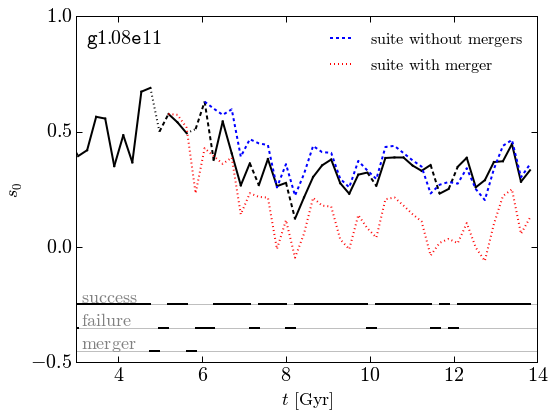

In [20]:
# PLOT MEAN EVOLUTION OF THE INNER SLOPE

time=array(t2_array_all).flatten().copy()
s0=alpha_fit

axlims=[3,14,-0.5,1]
val1=-0.25
val0=-0.35
valm=-0.45

figure(figsize=figsize)
axis(axlims)

ax=gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
abscisse=linspace(xlim[0],xlim[1])
plot(abscisse,val0*ones_like(abscisse),'gray',alpha=0.5)
plot(abscisse,val1*ones_like(abscisse),'gray',alpha=0.5)
plot(abscisse,valm*ones_like(abscisse),'gray',alpha=0.5)
ax.annotate(r'$\rm failure$',(0.01,(val0-ylim[0])/(ylim[1]-ylim[0])+0.005),xycoords='axes fraction',color='gray')
ax.annotate(r'$\rm success$',(0.01,(val1-ylim[0])/(ylim[1]-ylim[0])+0.005),xycoords='axes fraction',color='gray')
ax.annotate(r'$\rm merger $',(0.01,(valm-ylim[0])/(ylim[1]-ylim[0])+0.005),xycoords='axes fraction',color='gray')

i_example=where(array(sims)==sim)[0][0]

count=0
for k in range(size(gl)-1)[4:]:
    is_merger=(fmerger[k+1]>0.1)
    is_previous_merger=(fmerger[k]>0.1)
    is_success=((delta[k+1]<=Dsnapshot_threshold) and ((delta[k+1]<=delta_i[k+1]) or (delta_if[k+1]<=0.03)))
    if is_merger: # or is_previous_merger:
        plot(time[k:k+2],alpha_fit[k:k+2],'k',ls=':',lw=2)
        plot(time[k:k+2],valm*ones(2),'k-',lw=2)
    elif is_success:
        if count==0:
            plot(time[k:k+2],alpha_fit[k:k+2],'k-',lw=2)#,label=r'$\mathtt{g1.08e11}$')
            count+=1
        else:
            plot(time[k:k+2],alpha_fit[k:k+2],'k-',lw=2)
        plot(time[k:k+2],val1*ones(2),'k-',lw=2)

    else:
        plot(time[k:k+2],alpha_fit[k:k+2],'k--',dashes=(4,3),lw=2)
        if ~isnan(alpha_fit[k:k+2]).any(): 
            plot(time[k:k+2],val0*ones(2),'k-',lw=2)

plot(time,s0_successive_nomergers,'b--',dashes=(3,3),lw=2,label=r'$\rm suite$ $\rm without$ $\rm mergers$')
plot(time,s0_successive_mergers,'r:',lw=2,label=r'$\rm suite$ $\rm with$ $\rm merger$')

xlabel(r'$t$ $\rm [Gyr]$')
ylabel(r'$s_{\rm 0}$')
legend(loc='upper right',frameon=False,fontsize=16)

ax.text(0.02,0.92,r'$\mathtt{%s}$'%sim,transform=ax.transAxes,ha='left',fontsize=20)

xticknames=[r'$0$',r'$2$',r'$4$',r'$6$',r'$8$',r'$10$',r'$12$',r'$14$']
xticks([0,2,4,6,8,10,12,14],xticknames,visible=True)
yticknames=[r'$-1.0$',r'$-0.5$',r'$0.0$',r'$0.5$',r'$1.0$',r'$1.5$',r'$2.0$']
yticks([-1,-0.5,0,0.5,1,1.5,2],yticknames,visible=True)

axis(axlims)
